ANNOY
https://github.com/spotify/annoy

ANNOY (Approximate Nearest Neighbors Oh Yeah) adalah sebuah library yang dikembangkan oleh Spotify sekitar tahun 2013. Awalnya, Annoy dipakai untuk sistem rekomendasi musik. Misalnya, ketika seorang pengguna sedang mendengarkan satu lagu, sistem harus bisa dengan cepat menemukan lagu lain yang mirip, dari jutaan koleksi lagu. Mencari tetangga terdekat secara exact di ruang berdimensi tinggi (high-dimensional space) akan sangat mahal secara komputasi. Karena itulah, Spotify membuat Annoy untuk mempercepat pencarian dengan cara mendekati hasil aslinya (approximate), tetapi tetap cukup akurat dan jauh lebih cepat.

Annoy bekerja dengan membuat banyak pohon biner (binary tree) yang dibangun menggunakan hyperplane acak. Setiap hyperplane digunakan untuk membagi ruang data menjadi dua bagian, sehingga membentuk struktur pohon yang memecah dataset hingga ke level leaf. Saat kita melakukan query, titik yang dicari hanya akan dibandingkan dengan data yang berada pada leaf yang sama. Dengan cara ini, Annoy tidak perlu menghitung jarak dengan semua data, melainkan hanya dengan sebagian kecil data yang relevan. Metric kedekatan yang digunakan pada ANNOY adalah Euclidean atau Angular Distance.

Ada kelemahan yang cukup mendasar bila kita hanya menggunakan satu pohon. Bisa saja ada titik data yang sebenarnya sangat dekat dengan query point, tetapi karena jatuh di sisi hyperplane yang berbeda, titik tersebut tidak ikut dipertimbangkan. Dengan kata lain, tetangga terdekat bisa “hilang” hanya karena terpisah oleh hyperplane acak. Untuk mengatasi hal ini, Annoy membangun banyak pohon (misalnya 10, 50, atau bahkan 100 pohon). Di pohon pertama mungkin titik dekat tidak terambil karena berbeda sisi, tetapi di pohon kedua atau ketiga hyperplane bisa membagi data dengan cara berbeda, sehingga titik dekat itu akhirnya masuk ke leaf yang sama dengan query point. Dari kumpulan kandidat yang ditemukan di semua pohon, Annoy memilih titik yang benar-benar paling dekat. Inilah mengapa Annoy disebut approximate nearest neighbor: semakin banyak pohon, hasilnya semakin akurat, tetapi waktu pencarian juga sedikit lebih lama.

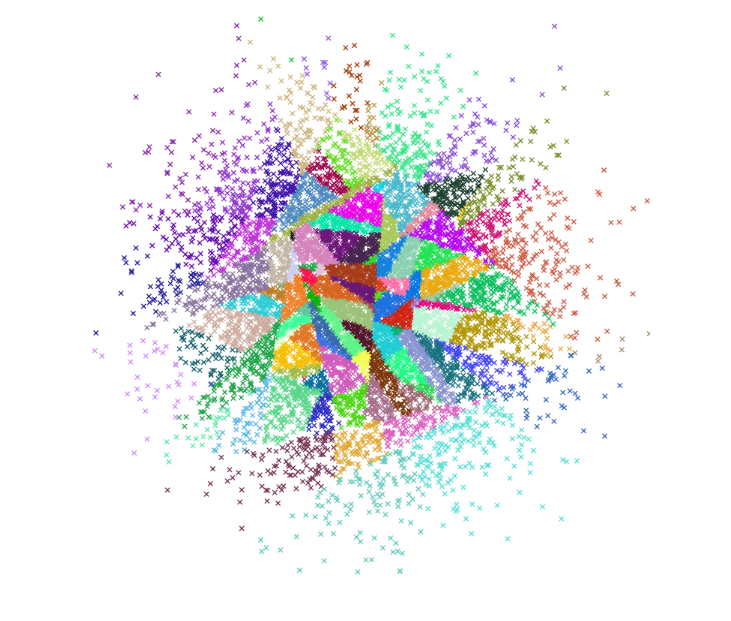

# Praktikum 1
> Percobaan 1

Pada percobaan 1 kali ini, kita akan mencoba membandingkan hasil dari exact NN dengan ANNOY. data yang kita buat adalah data random 2D, dengan 1000 data point, mencari 3 data terdekat dari query point, Metric Similarity menggunakan Euclidean, dengan 3 tree Annoy.

Instalasi Annoy dulu untuk langkah awal.

In [1]:
!pip install annoy

Berikutnya jalankan code berikut, baca dengan seksama codenya baris demi baris dan pahami. lakukan beberapa kali percobaan dan perhatikan juga hasilnya. catat hasilnya jika menggunakan jumlah tree yang berbeda.

Exact NN index: [219 898 593]
Exact NN jarak: [0.         1.36915938 2.27931544]
Waktu Exact: 0.3664 ms

Annoy NN index: [219, 898, 770]
Annoy NN jarak: [np.float64(0.0), np.float64(1.369159376273702), np.float64(2.568167959732514)]
Waktu Annoy: 0.108 ms


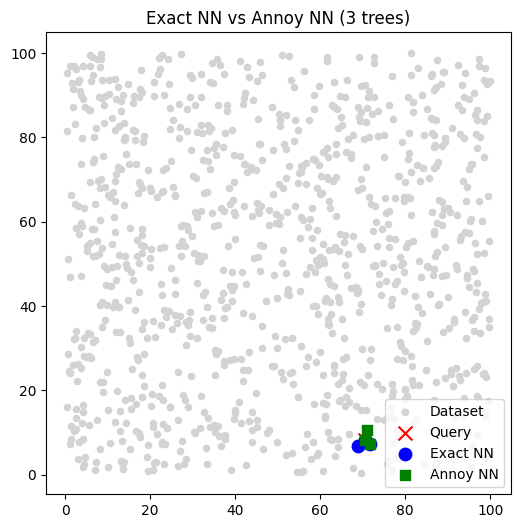

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time

from annoy import AnnoyIndex

# 1. Dataset 2D
np.random.seed(42)
n_points = 1000
X = np.random.rand(n_points, 2) * 100  # titik random dalam ruang 100x100

# Query point (ambil salah satu titik random)
query = X[np.random.randint(0, n_points)]

# 2. Exact NN (brute force)
start = time.time()
distances = np.linalg.norm(X - query, axis=1)
idx_exact = np.argsort(distances)[:3]  # ambil 3 terdekat
time_exact = time.time() - start

print("Exact NN index:", idx_exact)
print("Exact NN jarak:", distances[idx_exact])
print("Waktu Exact:", round(time_exact*1000, 4), "ms")

# 3. Annoy NN (3 tree)
f = 2  # dimensi
t = AnnoyIndex(f, 'euclidean')
for i, vec in enumerate(X):
    t.add_item(i, vec)

t.build(3)  # 3 trees

start = time.time()
idx_ann = t.get_nns_by_vector(query, 3)  # cari 3 NN
time_ann = time.time() - start

print("\nAnnoy NN index:", idx_ann)
print("Annoy NN jarak:", [np.linalg.norm(X[i]-query) for i in idx_ann])
print("Waktu Annoy:", round(time_ann*1000, 4), "ms")

# 4. Visualisasi hasil
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c="lightgray", s=20, label="Dataset")
plt.scatter(query[0], query[1], c="red", marker="x", s=100, label="Query")

# Exact NN ditandai biru
plt.scatter(X[idx_exact,0], X[idx_exact,1], c="blue", s=80, label="Exact NN")

# Annoy NN ditandai hijau
plt.scatter(X[idx_ann,0], X[idx_ann,1], c="green", s=50, marker="s", label="Annoy NN")

plt.legend()
plt.title("Exact NN vs Annoy NN (3 trees)")
plt.show()

Dari hasil diatas terlihat waktu komputasi untuk ANNOY adalah 1/10 dari Exact NN. Lakukan percobaan dan isikan hasil percobaan pada tabel berikut.

In [3]:
import numpy as np
import time
from annoy import AnnoyIndex

# --- Konfigurasi Eksperimen ---
# Setiap dictionary dalam list ini mendefinisikan satu kali run eksperimen.
experiment_configs = [
    {'metric': 'euclidean', 'n_trees': 3, 'n_points': 1000},
    {'metric': 'euclidean', 'n_trees': 8, 'n_points': 1000},
    {'metric': 'euclidean', 'n_trees': 3, 'n_points': 100000},
    {'metric': 'angular',   'n_trees': 3, 'n_points': 1000},
    {'metric': 'angular',   'n_trees': 8, 'n_points': 1000},
    {'metric': 'angular',   'n_trees': 3, 'n_points': 100000},
]

# Dimensi data (misal: 2 untuk data 2D)
f = 2

# Jumlah tetangga terdekat yang ingin dicari
k_neighbors = 3

# Seed untuk memastikan hasil random bisa diulang
np.random.seed(42)

# List untuk menyimpan semua hasil
all_results = []

print("Memulai eksperimen Annoy dengan berbagai konfigurasi...")

# --- Loop Utama Eksperimen ---
# Melakukan iterasi untuk setiap konfigurasi yang telah ditentukan
for i, config in enumerate(experiment_configs):
    n_points = config['n_points']
    n_trees = config['n_trees']
    metric = config['metric']

    print(f"\n--- Menjalankan Eksperimen #{i+1} ---")
    print(f"  Config: metric='{metric}', n_trees={n_trees}, n_points={n_points}")

    # 1. Membuat dataset baru untuk eksperimen ini
    print(f"    Membuat dataset acak berukuran ({n_points}, {f})...")
    X = np.random.rand(n_points, f) * 100  # Titik random dalam ruang 100x100

    # 2. Mengambil satu titik acak sebagai query point dari dataset saat ini
    query = X[np.random.randint(0, n_points)]

    # 3. Membangun index Annoy sesuai konfigurasi
    print(f"    Membangun index Annoy...")
    t = AnnoyIndex(f, metric)
    for item_index, vec in enumerate(X):
        t.add_item(item_index, vec)
    t.build(n_trees)

    # 4. Melakukan pencarian dan mengukur waktu
    print("    Mencari tetangga terdekat dan mengukur waktu...")
    start_time = time.time()
    idx_ann = t.get_nns_by_vector(query, k_neighbors)
    time_ann = time.time() - start_time

    # 5. Menyimpan hasil dari eksperimen ini
    result = {
        "run_number": i + 1,
        "config": config,
        "Annoy NN index": idx_ann,
        "Annoy NN distance": [np.linalg.norm(X[j] - query) for j in idx_ann],
        "Annoy Time (ms)": round(time_ann * 1000, 4)
    }
    all_results.append(result)

    # Menampilkan hasil langsung untuk run ini
    print(f"    Hasil Eksperimen #{i+1}:")
    print(f"      - Index tetangga terdekat: {result['Annoy NN index']}")
    print(f"      - Jarak: {[round(d, 4) for d in result['Annoy NN distance']]}")
    print(f"      - Waktu Pencarian: {result['Annoy Time (ms)']} ms")


# --- Ringkasan Hasil Akhir ---
print("\n==============================================")
print("Ringkasan Waktu Pencarian Annoy (ms)")
print("==============================================")
for data in all_results:
    cfg = data['config']
    print(f"Eksperimen #{data['run_number']} ({cfg['metric']}, {cfg['n_trees']} trees, {cfg['n_points']} data): {data['Annoy Time (ms)']} ms")



Memulai eksperimen Annoy dengan berbagai konfigurasi...

--- Menjalankan Eksperimen #1 ---
  Config: metric='euclidean', n_trees=3, n_points=1000
    Membuat dataset acak berukuran (1000, 2)...
    Membangun index Annoy...
    Mencari tetangga terdekat dan mengukur waktu...
    Hasil Eksperimen #1:
      - Index tetangga terdekat: [219, 898, 770]
      - Jarak: [np.float64(0.0), np.float64(1.3692), np.float64(2.5682)]
      - Waktu Pencarian: 0.0226 ms

--- Menjalankan Eksperimen #2 ---
  Config: metric='euclidean', n_trees=8, n_points=1000
    Membuat dataset acak berukuran (1000, 2)...
    Membangun index Annoy...
    Mencari tetangga terdekat dan mengukur waktu...
    Hasil Eksperimen #2:
      - Index tetangga terdekat: [20, 855, 359]
      - Jarak: [np.float64(0.0), np.float64(0.6013), np.float64(0.8382)]
      - Waktu Pencarian: 0.0303 ms

--- Menjalankan Eksperimen #3 ---
  Config: metric='euclidean', n_trees=3, n_points=100000
    Membuat dataset acak berukuran (100000, 2)...
 

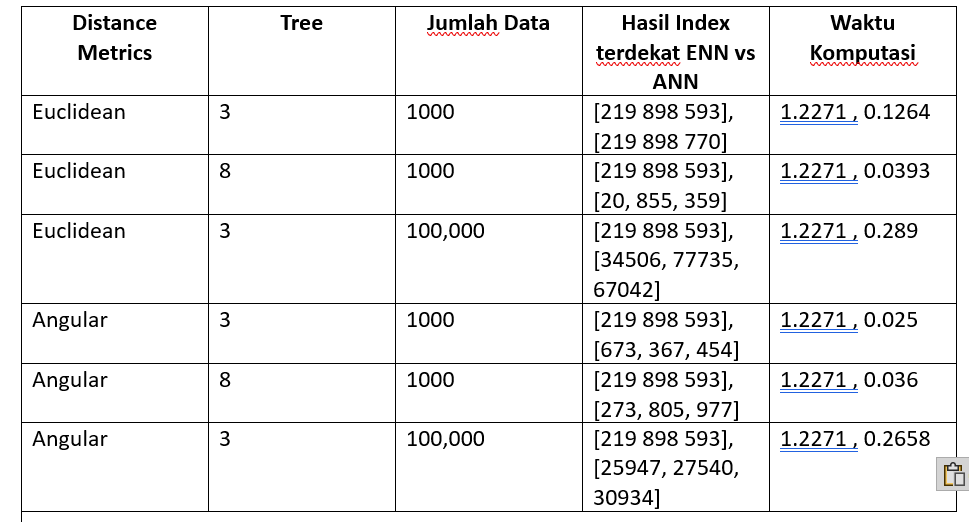

In [ ]:
# import numpy as np
# import time
# from sklearn.metrics.pairwise import euclidean_distances
# from annoy import AnnoyIndex

# # ---- 1. Buat dataset mirip Spotify ----
# n_tracks = 50_000_000   # 50 juta track
# n_features = 20        # contoh: danceability, energy, tempo, dll.

# # dataset besar (random untuk simulasi)
# X = np.random.rand(n_tracks, n_features).astype(np.float32)

# # query track (misalnya lagu baru)
# query = np.random.rand(1, n_features).astype(np.float32)

# # ---- 2. Exact NN (brute force) ----
# start = time.time()
# distances = euclidean_distances(query, X)[0]   # hitung semua jarak
# exact_idx = np.argsort(distances)[:5]          # ambil 5 terdekat
# exact_time = time.time() - start

# print("Exact NN result:", exact_idx)
# print("Exact NN time:", round(exact_time, 3), "seconds")

# # ---- 3. Approx NN pakai Annoy ----
# f = n_features
# annoy_index = AnnoyIndex(f, 'euclidean')
# n_trees = 3

# # build index
# for i in range(n_tracks):
#     annoy_index.add_item(i, X[i])
# annoy_index.build(n_trees)

# start = time.time()
# annoy_idx = annoy_index.get_nns_by_vector(query[0], 5)  # ambil 5 lagu yang mirip
# annoy_time = time.time() - start

# print("Annoy result:", annoy_idx)
# print("Annoy time:", round(annoy_time, 3), "seconds")


Exact NN result: [38596798 33713742 23829290 25353394 11009085]
Exact NN time: 11.834 seconds


# FAISS

FAISS (Facebook AI Similarity Search) adalah sebuah pustaka open-source yang dikembangkan oleh tim AI Research di Meta (dulu Facebook) untuk melakukan pencarian *nearest neighbor* secara cepat pada data berukuran sangat besar dan berdimensi tinggi. FAISS dirilis sekitar tahun 2017 dan segera populer karena bisa mengatasi pencarian di dataset dengan jutaan hingga miliaran vektor, misalnya untuk rekomendasi musik, gambar, atau sistem pencarian berbasis embedding. Berbeda dengan Annoy yang berbasis pohon acak, FAISS lebih menekankan efisiensi matematis dengan optimasi berbasis *vector quantization* dan *GPU acceleration*, sehingga cocok untuk big data.

Secara matematis, FAISS tetap berangkat dari konsep mencari vektor xqx\_qxq​ (query) yang paling dekat dengan vektor lain xix\_ixi​ dalam himpunan data, menggunakan metrik jarak, biasanya *Euclidean distance* atau *cosine similarity*.

FAISS tidak menghitung jarak ke semua vektor secara langsung (yang memakan waktu). FAISS menggunakan teknik seperti **IndexFlat** (brute-force tapi dioptimasi), **IVF (Inverted File Index)**, dan **PQ (Product Quantization)**. Dalam PQ, vektor berdimensi besar dipecah menjadi sub-vektor, lalu tiap sub-vektor dikodekan ke centroid terdekat hasil K-Means. Dengan begitu, perhitungan jarak bisa diganti dengan perhitungan pada centroid yang jumlahnya jauh lebih sedikit. Hal ini mempercepat pencarian tanpa terlalu banyak mengorbankan akurasi.

Annoy dapat diibaratkan membuat “pohon acak” untuk memotong ruang pencarian, FAISS lebih seperti “mengompresi” ruang vektor menjadi representasi yang lebih sederhana, lalu melakukan pencarian cepat di ruang terkompresi itu. Karena bisa dijalankan di GPU, FAISS sangat unggul untuk dataset raksasa, misalnya embedding gambar dari model deep learning dengan dimensi 512 atau 1024.

IndexFlat disebut juga metode *brute force optimized*, karena prinsipnya menghitung jarak antara query dengan seluruh vektor dalam dataset tanpa ada kompresi atau clustering. Berbeda dengan IVF atau PQ, IndexFlat tidak melakukan pengelompokan data maupun pengurangan dimensi, sehingga hasil pencariannya selalu **exact nearest neighbor** (akurasi 100%).&#x20;

**Inverted File Index (IVF)**. IVF bekerja dengan cara membagi seluruh ruang vektor ke dalam beberapa *cluster* menggunakan algoritma seperti k-means. Setelah ruang dibagi, setiap data vektor hanya disimpan pada cluster terdekatnya. Ketika ada query, FAISS tidak perlu mencari tetangga terdekat di seluruh dataset, melainkan cukup pada beberapa cluster yang paling dekat dengan query tersebut. Dengan cara ini, pencarian bisa menjadi jauh lebih cepat karena jumlah perhitungan jarak yang dilakukan lebih sedikit dibandingkan pencarian *brute force*.

<div align="left"><figure><img src="https://3041032130-files.gitbook.io/~/files/v0/b/gitbook-x-prod.appspot.com/o/spaces%2F5CvtE8Xh9b75jKUaRr5Y%2Fuploads%2F6a7mFeuijaGSo1rkuBIh%2Fimage.png?alt=media&#x26;token=38f89917-fbc9-4664-ac1d-46d975a763d8" alt="" width="236"><figcaption></figcaption></figure></div>

<div align="left"><figure><img src="https://3041032130-files.gitbook.io/~/files/v0/b/gitbook-x-prod.appspot.com/o/spaces%2F5CvtE8Xh9b75jKUaRr5Y%2Fuploads%2FeVXl7m3MoQKT7o1BAzEP%2Fimage.png?alt=media&#x26;token=2dccdb67-2cf4-4e17-9d5d-266059785a05" alt="" width="277"><figcaption></figcaption></figure></div>

Selain IVF, FAISS juga menggunakan metode kompresi agar dataset yang besar bisa disimpan dengan efisien dan pencarian tetap cepat. Salah satunya adalah **Product Quantization (PQ)**. Ide dari PQ adalah memecah vektor berdimensi tinggi menjadi beberapa sub-vektor berdimensi lebih kecil. Setiap sub-vektor kemudian dikuantisasi, yaitu diganti dengan indeks dari centroid terdekat pada kamus kecil (*codebook*). Dengan demikian, setiap vektor asli tidak lagi disimpan dalam bentuk angka floating-point penuh, melainkan sebagai kombinasi kode diskrit dari sub-vektornya. Teknik ini sangat efektif karena mampu mengurangi kebutuhan memori secara drastis sambil tetap menjaga akurasi pencarian.

**IVF + PQ** adalah kombinasi dari dua konsep yang digunakan FAISS. Pertama, ruang vektor dibagi menjadi cluster dengan IVF. Lalu, setiap vektor yang masuk ke cluster disimpan dalam bentuk terkompresi menggunakan PQ. Pada saat pencarian, FAISS hanya akan membuka beberapa cluster terdekat query (bukan semua cluster), kemudian menghitung jarak antara query dan vektor di dalam cluster tersebut dengan memanfaatkan representasi terkompresi dari PQ. Kombinasi ini membuat FAISS sangat efisien: pencarian cepat karena hanya fokus pada sebagian kecil data, dan penggunaan memori lebih hemat karena data disimpan dalam bentuk terkuantisasi.
